# Opening and viewing the data

Simulated observations are stored in HDF5 archives. They can be a pain to open and close, but I made a handy `ObservationArchive` object that does the HDF5 manipulation for you. Let's import some stuff

In [30]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
from astropy.time import Time

import sys
sys.path.insert(0, '../')

In [90]:
from libra import ObservationArchive, nirspec_pixel_wavelengths

You open a "context manager" (a `with` block) for each observation, like this: 

In [97]:
# This is a grid of the wavelengths observed by NIRSpec: 
wavelengths =  nirspec_pixel_wavelengths()
    
with ObservationArchive("tyler0_b", 'r') as obs:
    observation = obs.b[0]  # Get the first observation of planet "b" - this line won't change for your examples

Now that you have access to the `observation`, you can do things with it within the `with` block. 

For example, let's plot the time-series spectra: 

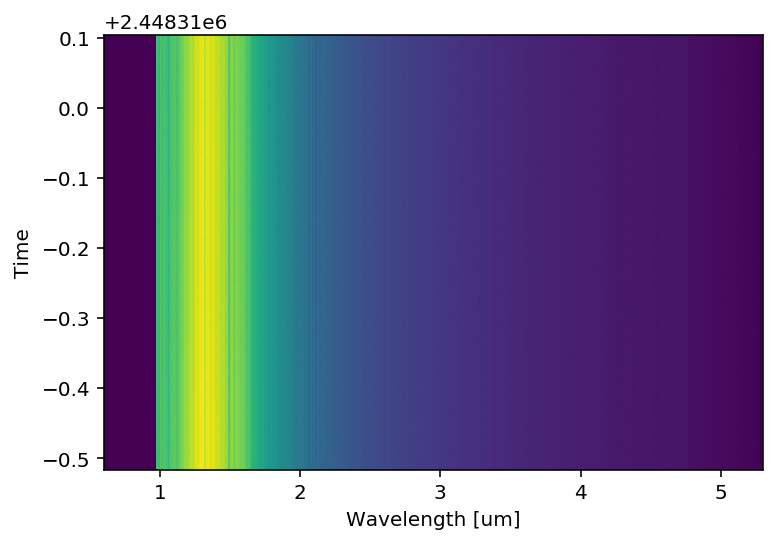

In [110]:
with ObservationArchive("tyler1_b", 'r') as obs:
    observation = obs.b[0] 
    
    extent = [wavelengths.min().value, wavelengths.max().value,
              observation.times.min(), observation.times.max()]
    plt.imshow(observation.spectra, origin='lower', extent=extent, aspect=5)
    plt.xlabel('Wavelength [um]')
    plt.ylabel('Time')

You can see that the peak in flux is towards short wavelengths for this star. It may appear that the peak flux is at 1.25 $\mu$m, but what you're actually seeing is the peak in the instrument throughput.

You can make a band-integrated light curve like this: 

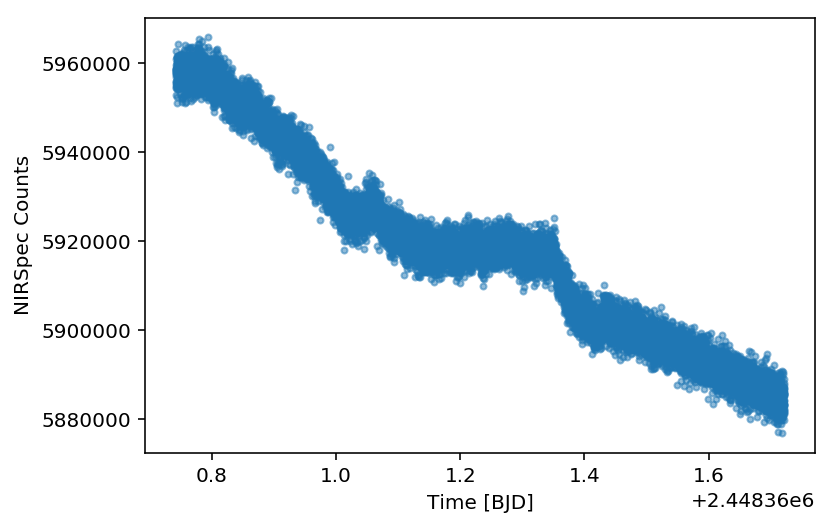

In [108]:
with ObservationArchive("tyler2_b", 'r') as obs:
    observation = obs.b[0]
    total_flux = np.sum(observation.spectra, axis=1) # Sum along wavelength axis
    plt.plot(observation.times, total_flux, '.', alpha=0.5)
    plt.xlabel('Time [BJD]')
    plt.ylabel('NIRSpec Counts')

You could also break up the spectra into arbitrary color bins like this: 

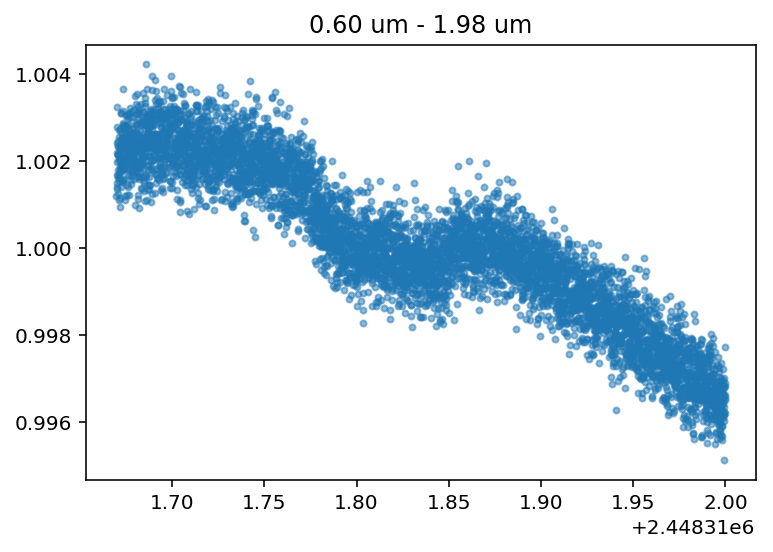

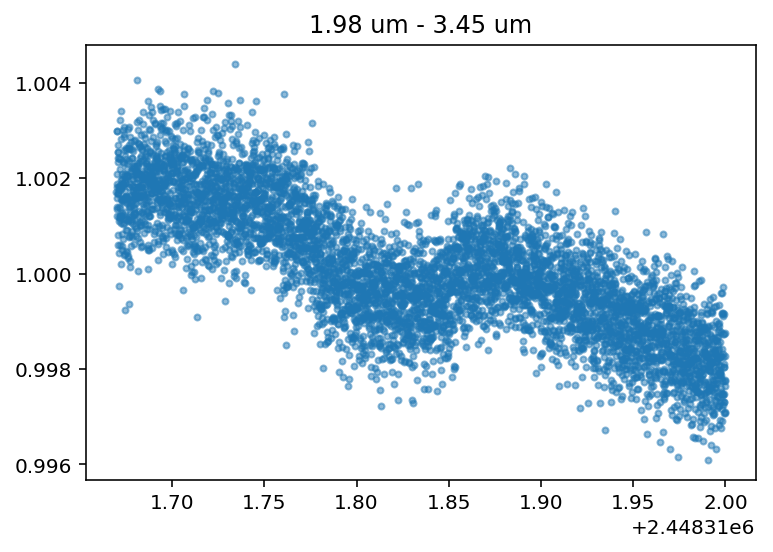

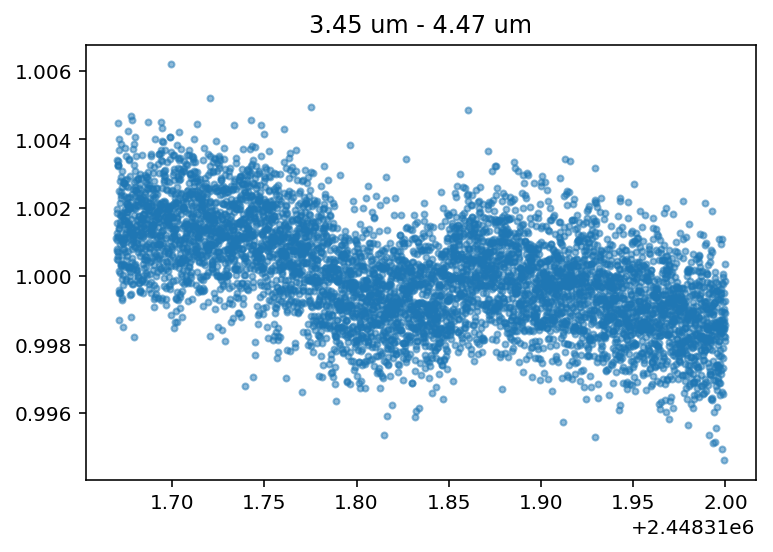

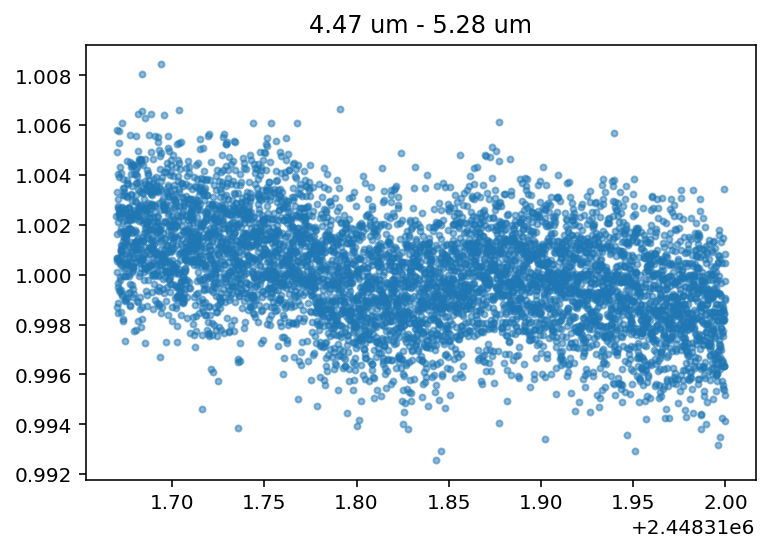

In [109]:
chunks = [0, 100, 200, 300, 400]

with ObservationArchive("tyler3_b", 'r') as obs:
    observation = obs.b[0]

    for i in range(len(chunks)-1):
        wavelengths_covered = wavelengths[chunks[i]], wavelengths[chunks[i+1]]
        f = np.sum(observation.spectra[:, chunks[i]:chunks[i+1]], axis=1)
        plt.figure()
        plt.plot(observation.times, f/np.median(f), '.', alpha=0.5)
        plt.title('{0:.2f} - {1:.2f}'.format(*wavelengths_covered))

Happy hunting 😀